In [1]:
##### Model 1 to detect nodes#####

In [172]:
import math
import pandas as pd
import numpy as np
columns = ['label']
columns += ['pixel'+str(i) for i in range(1,50)]
data1 = pd.read_csv("NTruefinal.csv",names = columns, dtype = np.float32)#Model 1 dataset
data1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,...,1.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0


In [173]:
from platform import python_version

print(python_version())

3.5.6


In [174]:
data1.shape

(1773, 50)

In [175]:
unique, counts = np.unique(data1.iloc[:,0], return_counts=True)#No.of zero labels and one labels
dict(zip(unique, counts))

{0.0: 887, 1.0: 886}

In [176]:
import numpy as np
import csv

def flat_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

Aa=np.loadtxt(open("m_d_banknote.csv", "rb"), delimiter=",")
R=Aa
#A = A.astype(np.uint16)
rows = Aa.shape[0]
cols = Aa.shape[1]
maxValue = np.amax(Aa)
minValue = np.amin(Aa)
fa=[]
for x in range(0, cols ):
    for y in range(0, rows):
        Aa[x,y]=math.ceil(((Aa[x,y]-minValue)/(maxValue-minValue))*255) # Normalization


B=np.pad(Aa, ((3,3),(3,3)), 'constant',constant_values=0) #Padding with 0's
for j in range(3,len(Aa)+3):
    fa.append(flat_list(B[j-3:j+4,j-3:j+4]))
with open("Realivat.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(fa) 

In [177]:
from sklearn.model_selection import train_test_split
X = data1.drop('label', axis=1)
y = data1['label']
X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.2, 
                                        random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))



0.0
Accuracy: 0.9943661971830986


In [178]:
any(y_test==1)

True

In [179]:
X_test.shape

(355, 49)

In [180]:
daa= pd.read_csv("Realivat.csv",dtype = np.float32)
xpred = daa
x = rfc.predict(xpred)

In [181]:
import matplotlib.patches as patches
from PIL import Image

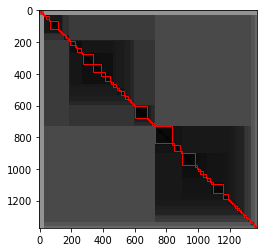

In [182]:

L=[]# Model 1 Output cordinates
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(Aa.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
#B = A.astype('float32')*255.0/65536.0
#B = B.astype('uint16')
ax.imshow(R,cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('model1banknote.eps') 
plt.show()
 


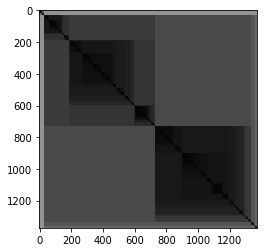

In [183]:
plt.imshow(Aa, cmap='gray')

In [184]:
L

[8,
 18,
 25,
 26,
 28,
 30,
 31,
 32,
 38,
 57,
 58,
 61,
 64,
 115,
 118,
 121,
 127,
 134,
 137,
 140,
 141,
 151,
 158,
 166,
 171,
 177,
 181,
 188,
 191,
 194,
 221,
 231,
 237,
 264,
 267,
 268,
 274,
 338,
 391,
 411,
 445,
 451,
 461,
 481,
 486,
 491,
 501,
 511,
 531,
 538,
 558,
 568,
 578,
 581,
 591,
 598,
 599,
 600,
 601,
 602,
 603,
 680,
 682,
 689,
 690,
 691,
 692,
 693,
 696,
 701,
 711,
 712,
 722,
 723,
 724,
 729,
 730,
 838,
 847,
 848,
 849,
 850,
 851,
 885,
 886,
 887,
 888,
 889,
 890,
 901,
 978,
 991,
 993,
 1001,
 1003,
 1010,
 1031,
 1032,
 1033,
 1049,
 1050,
 1051,
 1056,
 1057,
 1058,
 1078,
 1080,
 1081,
 1092,
 1155,
 1156,
 1157,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1202,
 1208,
 1212,
 1222,
 1223,
 1224,
 1225,
 1234,
 1235,
 1236,
 1246,
 1247,
 1257,
 1258,
 1259,
 1260,
 1262,
 1269,
 1270,
 1279,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1291,
 1292,
 1293,
 1303,
 1304,
 1309,
 1312,
 1313,
 1316,
 1317,
 1318,
 1319,
 

In [160]:
#### Model 2 to detect Corners######

In [185]:
R.shape

(1372, 1372)

In [186]:
##### Training #####


import math
import pandas as pd
import numpy as np
columns = ['label']
for i in range(9):
    name = 'mean'+str(i+1)
    columns += [name]
for i in range(9):
    name = 'var'+str(i+1)
    columns += [name]
for i in range(36):
    name = 'interVar'+str(i+1)
    columns += [name]
data = pd.read_csv("M-V.csv",names = columns, dtype = np.float32)
data.head()



,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,0.0,255.0,1.333333,1.111111,255.0,2.0,0.666667,255.0,2.0,1.0,...,0.333333,5760.810059,0.0,0.09,12128.520508,0.444444,0.020833,12001.6875,16129.0,0.1875
1,0.0,255.0,2.000000,0.666667,255.0,2.0,1.000000,255.0,2.0,1.0,...,0.187500,5760.810059,0.0,0.09,12096.750000,0.250000,0.000000,12001.6875,16129.0,0.1875
2,0.0,255.0,2.000000,0.777778,255.0,2.0,1.000000,255.0,2.0,1.0,...,0.187500,5760.810059,0.0,0.09,12096.750000,0.250000,0.000000,12001.6875,16129.0,0.1875
3,0.0,255.0,2.000000,0.888889,255.0,2.0,1.000000,255.0,2.0,1.0,...,0.187500,5760.810059,0.0,0.09,12096.750000,0.250000,0.000000,12001.6875,16129.0,0.1875
4,0.0,255.0,2.000000,1.000000,255.0,2.0,1.000000,255.0,2.0,1.0,...,0.187500,5760.810059,0.0,0.09,12096.750000,0.250000,0.000000,12001.6875,16129.0,0.1875


In [187]:
unique, counts = np.unique(data.iloc[:,0], return_counts=True)
dict(zip(unique, counts))

{0.0: 1141, 1.0: 1168}

In [188]:

from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc2.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))








0.015625
Accuracy: 0.9956709956709957


In [189]:
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
#classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)

#classifier_rbf.fit(X,y)
#classifier_linear.fit(X,y)
#tic = time.process_time()
#Y_pred_rbf = classifier_rbf.predict(X_test)
#Y_linear = classifier_linear.predict(X_test)
#toc = time.process_time()
#print(toc - tic)

#print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
#print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))

In [190]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=5)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)


#Train the model using the training sets
#knn.fit(X, y)
#tic = time.process_time()
#Predict the response for test dataset
#knn_pred = knn.predict(X_test)
#toc = time.process_time()
#print(toc - tic)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

In [191]:
### Testing ###

Ax=np.loadtxt(open("m_d_banknote.csv" , "rb"), delimiter=",")
rows = Ax.shape[0]
cols = Ax.shape[1]
maxValue = np.amax(Ax)
minValue = np.amin(Ax)
for x in range(0, cols ):
    for y in range(0, rows):
        Ax[x,y]=math.ceil(((Ax[x,y]-minValue)/(maxValue-minValue))*255)
Bx=np.pad(Ax, ((3,3),(3,3)), 'constant',constant_values=255)
#Cx=np.loadtxt(open("label.csv" , "rb"), delimiter="/n") 




In [233]:
def mvfeaturegeneration(b):
    W=b
    g1=W[0:3,0:3]#groups
    g2=W[0:3,3]
    g3=W[0:3,4:7]
    g4=W[3,0:3]
    g5=W[3,3]
    g6=W[3,4:7]
    g7=W[4:7,0:3]
    g8=W[4:7,3]
    g9=W[4:7,4:7]
    groups = [g1,g2,g3,g4,g5,g6,g7,g8,g9]
    
    meanf = np.zeros(9)
    varf = np.zeros(9)
    for idx,grp in enumerate(groups):
        mean = np.mean(grp)
        var = np.sum((grp-mean)**2)
        meanf[idx] = mean
        varf[idx] = var
    
    intervarf = np.zeros(36)
    idx = 0
    for i in range(9):
        for j in range(i+1,9):
            g1 = groups[i]
            g2 = groups[j]
            W1=(g1.size)/((g1.size)+(g2.size))
            W2=(g2.size)/((g1.size)+(g2.size))
            mu=((meanf[i]-meanf[j])**2)
            ivar=W1*W2*mu
            intervarf[idx] = ivar
            idx += 1

    return (np.concatenate((meanf,varf,intervarf),axis=None).tolist())

In [234]:
L.insert(0,0)
s=len(Ax)
M = []
for i in range(len(L)):  
    J=L[i]+3
    if(J+3 < s+3):
        for j in range(J+3,s+3):
            M.append(mvfeaturegeneration(Bx[int(j-3):int(j+4),int(J-3):int(J+4)])+[j,J])
    print("completed feature generation: {:.2f}%".format((i+1)*100/len(L)))
M = np.array(M)

completed feature generation: 0.53%
completed feature generation: 1.07%
completed feature generation: 1.60%
completed feature generation: 2.14%
completed feature generation: 2.67%
completed feature generation: 3.21%
completed feature generation: 3.74%
completed feature generation: 4.28%
completed feature generation: 4.81%
completed feature generation: 5.35%
completed feature generation: 5.88%
completed feature generation: 6.42%
completed feature generation: 6.95%
completed feature generation: 7.49%
completed feature generation: 8.02%
completed feature generation: 8.56%
completed feature generation: 9.09%
completed feature generation: 9.63%
completed feature generation: 10.16%
completed feature generation: 10.70%
completed feature generation: 11.23%
completed feature generation: 11.76%
completed feature generation: 12.30%
completed feature generation: 12.83%
completed feature generation: 13.37%
completed feature generation: 13.90%
completed feature generation: 14.44%
completed feature g

In [235]:
preds = rfc2.predict(M[:,:-2])
D = M[preds == 1,-2:]

In [236]:
x1 = np.array(D)[:,0] -3 # To remove padding shift
y1 = np.array(D)[:,1] - 3

In [237]:
D

array([[   6.,    3.],
       [  10.,    3.],
       [  11.,    3.],
       ...,
       [1372., 1365.],
       [1373., 1365.],
       [1374., 1371.]])

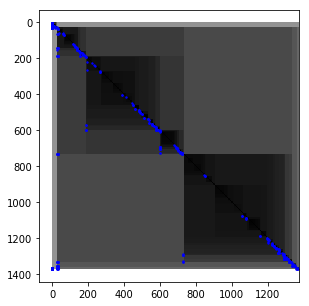

In [245]:
plt.figure(figsize = (10,5))
plt.imshow(Aa, cmap='gray')
plt.scatter(y1,x1, c='b',s=2)
plt.savefig('model2cortex.eps') 

In [ ]:
#Other Models not needed now

In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X, y)
tic = time.process_time()
knn_pred = knn.predict(X_test)
toc = time.process_time()
print(toc - tic)

#Predict the response for test dataset


from sklearn import metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

TypeError: Singleton array array(1055) cannot be considered a valid collection.

In [223]:
any(y_test==1)

True

In [224]:
x = knn.predict(xpred)

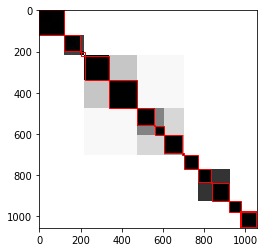

In [225]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionKNN4.eps') 
plt.show()
 

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
tic = time.process_time()
Des_pred = clf.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy:",metrics.accuracy_score(y_test, Des_pred))


0.0
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy: 0.9972222222222222


In [227]:
x = clf.predict(xpred)

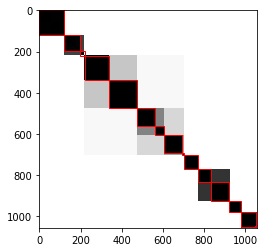

In [228]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionDTC4.eps') 
plt.show()

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)

classifier_rbf.fit(X,y)
classifier_linear.fit(X,y)
tic = time.process_time()
Y_pred_rbf = classifier_rbf.predict(X_test)
Y_linear = classifier_linear.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))


0.0625
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy_rbf: 0.5055555555555555
Accuracy_linear: 0.9972222222222222


In [230]:
x = classifier_linear.predict(xpred)

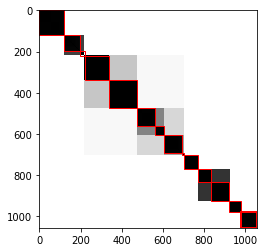

In [231]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionSVMlinear4.eps') 
plt.show()

In [209]:
a=[[1,2,3],[4,5,6]]

In [18]:
a[:][0:1]

[[1, 2, 3]]

In [23]:
from PIL import Image
import numpy as np
import sys
import os
import csv
img_file = Image.open('Ivatest.jpg')
    # img_file.show()

# get original image parameters...
width, height = img_file.size
format = img_file.format
mode = img_file.mode

# Make image Greyscale
img_grey = img_file.convert('L')
#img_grey.save('result.png')
#img_grey.show()

# Save Greyscale values
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
value = value.flatten()
print(value)
with open("Ivatest.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

[255 255 255 ... 255 255 255]


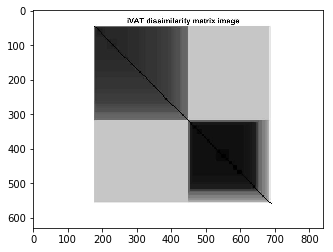

In [20]:
import matplotlib.image as img
import matplotlib.pyplot as plt
image = img.imread('Ivatest.jpg')
#print(image)
plt.imshow(image)